In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('weight-height.csv') #PR-2/
dataset.head()
     

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Определение количества уникальных значений

In [3]:
dataset.value_counts()


Gender  Height     Weight    
Female  54.263133  64.700127     1
Male    67.830001  172.776569    1
        67.809015  179.934465    1
        67.810251  170.457826    1
        67.814286  192.066392    1
                                ..
Female  64.854997  146.692798    1
        64.855262  150.397118    1
        64.859973  140.784838    1
        64.860659  159.568225    1
Male    78.998742  269.989699    1
Length: 10000, dtype: int64

Перевод дюймов и фунтов

In [4]:
dataset['Height'] * 2,54

(0       147.694034
 1       137.563808
 2       148.220211
 3       143.461957
 4       139.763592
            ...    
 9995    132.345304
 9996    134.134309
 9997    127.735984
 9998    138.068486
 9999    123.888492
 Name: Height, Length: 10000, dtype: float64,
 54)

In [5]:
dataset['Weight'] / 2,54

(0       120.946782
 1        81.155236
 2       106.370428
 3       110.021235
 4       103.174900
            ...    
 9995     68.388727
 9996     85.433953
 9997     64.237659
 9998     81.926231
 9999     56.824551
 Name: Weight, Length: 10000, dtype: float64,
 54)

Разделение датасета на 2 датафрейма по гендерному признаку

In [6]:
df_male = dataset[dataset['Gender'] == 'Male'].copy()

In [7]:
df_female = dataset[dataset['Gender'] == 'Female'].copy()
     

Нахождение кол-ва записей, мат.ожидания, станд.отклонения, min и max значений в коллекции мужского пола

In [8]:
def func(df_male):
    return len(df_male)
func(df_male)

5000

In [9]:
res_mean = df_male['Height'].mean()
print(res_mean)

69.02634590621741


In [10]:
deviation = df_male['Height'].std()
print(deviation)

2.863362228660647


In [11]:
min(df_male['Height'])

58.4069049317498

In [12]:
max(df_male['Height'])

78.9987423463896

Нахождение кол-ва записей, мат.ожидания, станд.отклонения, min и max значений в коллекции женского пола

In [13]:
def func(df_female):
    return len(df_female)
func(df_female)

5000

In [14]:
res_meanf = df_female['Height'].mean()
print(res_meanf)

63.70877360342507


In [15]:
deviation = df_female['Height'].std()
print(deviation)

2.6962840157650536


In [16]:
min(df_female['Height'])

54.2631333250971

In [17]:
max(df_female['Height'])

73.3895858660697

Гистограммы распределения роста, веса у мужского пола

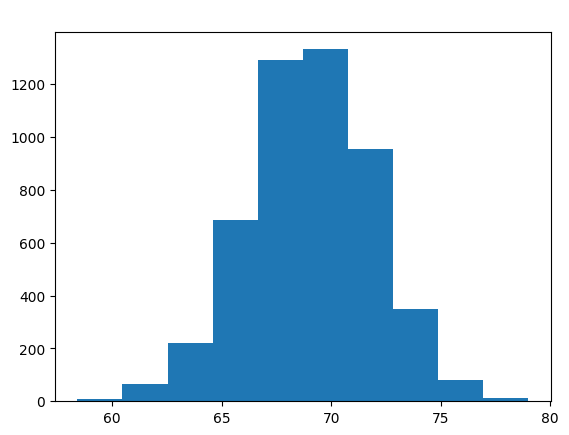

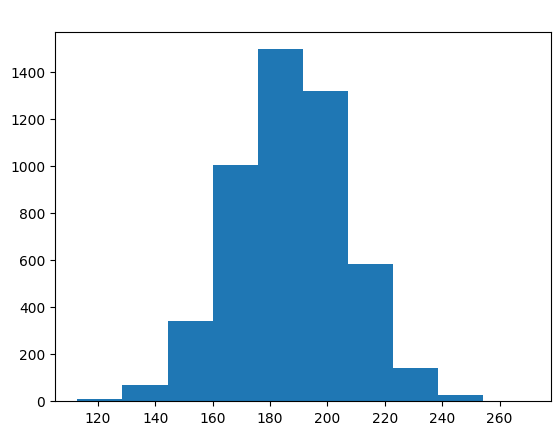

In [18]:
plt.hist(x=df_male['Height'])
plt.title(' ')
plt.show()

plt.hist(x=df_male['Weight'])
plt.title(' ')
plt.show()


Гистограммы распределения роста, веса у женского пола

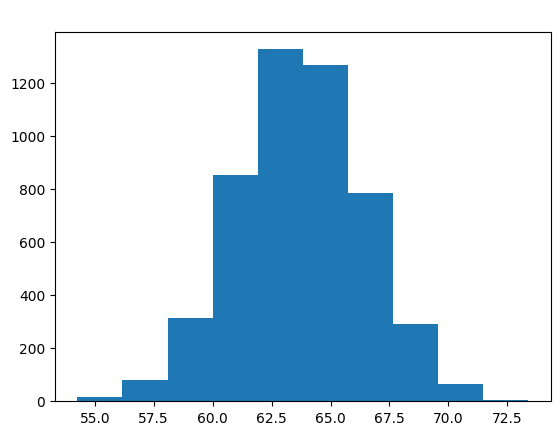

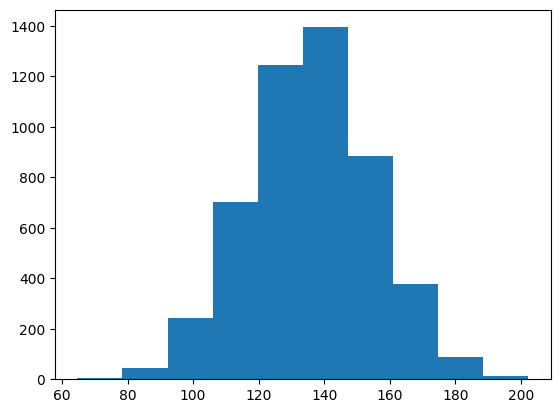

In [19]:
plt.hist(x=df_female['Height'])
plt.title(' ')
plt.show()

plt.hist(x=df_female['Weight'])
plt.show()


Кластеризация данных датасета методом к-средних

In [20]:
X = dataset.iloc[:, [ 1, 2]].values

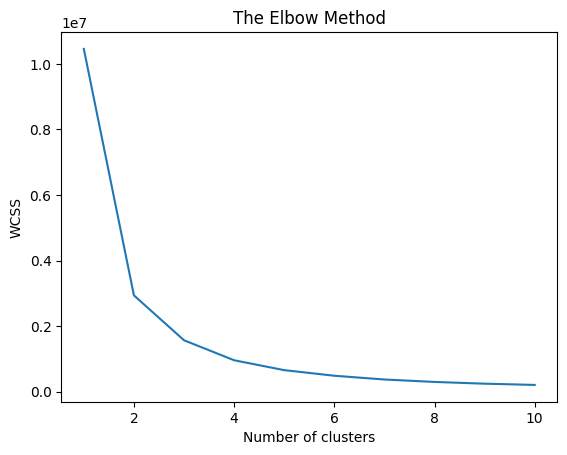

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [22]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


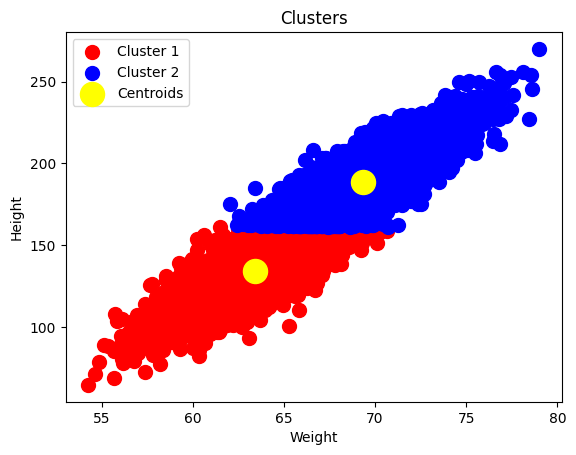

In [23]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()


Кластеризация данных датасета методом иерархической кластеризации

In [24]:
X = dataset.iloc[:, [1, 2]].values

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


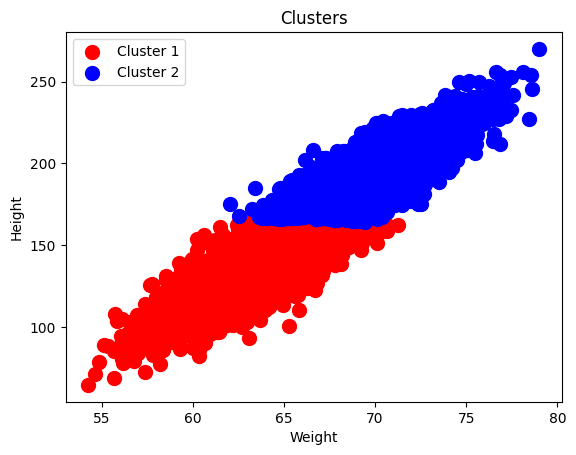

In [26]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

Функция предсказания для метода kmeans

In [27]:
kmeans.predict([[162,51]])

array([0])

Функция предсказания для иерархического метода

In [28]:
hc.fit_predict([[162,51],[162,51]])

array([1, 0], dtype=int64)

In [37]:
print(X)
y_kmeans

[[ 73.84701702 241.89356318]
 [ 68.78190405 162.31047252]
 [ 74.11010539 212.74085556]
 ...
 [ 63.86799221 128.47531878]
 [ 69.03424313 163.85246135]
 [ 61.94424588 113.64910268]]


array([1, 1, 1, ..., 0, 1, 0])

In [45]:
clusters = []
for i in list(dataset['Gender'].values):
    if i == 'Male':
        clusters.append(1)
    else:
        clusters.append(0)

In [46]:
from sklearn import metrics
metrics.rand_score(clusters, y_kmeans)

0.8306301830183018

In [49]:
metrics.rand_score(clusters, y_hc)

0.8179051705170517